# Initial regression analysis

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/Users/charlesoneill/DataspellProjects/bushfireanalysis/input/bushfire.csv')
df.columns = df.iloc[0]
df.drop([0], inplace=True)
df.rename(columns={ df.columns[0]: "Year", "Ha Burnt": "ha_burnt"}, inplace = True)
df.dropna(subset=['ha_burnt'], inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,Year,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun,Jul,Year,Aug-Jan,Sep-Jan,Oct-Jan,ha_burnt
0,1960-61,56.9,67.8,280.3,71.6,244.9,62.6,75,41,89.4,31.4,54,42,1960-61,784.1,727.2,659.4,0
1,1961-62,239.9,52.5,74.4,517.2,172.2,133.4,158.2,62.8,100.3,270.1,4.1,69.7,1961-62,1189.6,949.7,897.2,0
2,1962-63,109.7,86.5,21.9,10.4,114.1,138.7,50.4,387.8,238.6,211.1,264.8,67.2,1962-63,481.3,371.6,285.1,0
3,1963-64,269.2,24.8,62.4,41.5,279.1,18.2,37,171.7,139.6,78.1,407.5,9.5,1963-64,695.2,426,401.2,0
4,1964-65,25.7,15.1,86.3,74.2,38,36.8,22.7,8.4,85.1,42.6,236.3,97.8,1964-65,276.1,250.4,235.3,366000


## Linear regression

In [5]:
# October to January
oj = np.array(df['Oct-Jan'])
oj = list(map(float, oj))
# September to January
sj = np.array(df['Sep-Jan'])
sj = list(map(float, sj))
# August to January
aj = np.array(df['Aug-Jan'])
aj = list(map(float, aj))
# hectares burnt
hectares = np.array(df['ha_burnt'])
hectares = list(map(float, hectares))

In [6]:
np.corrcoef(oj, hectares)

array([[ 1.        , -0.28050907],
       [-0.28050907,  1.        ]])

Coefficients: 
 [-1751.53639897]
Mean squared error: 146930944309.89
Coefficient of determination: -8.07


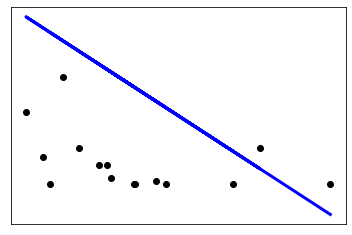

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# get the data
X, y = np.array(oj), hectares
X = X.reshape(-1, 1)

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
X

In [8]:
def rmse(y_test, y_pred): return np.sqrt(mean_squared_error(y_test, y_pred))

df_train, df_test = df[:45], df[45:]
X_train, y_train = df_train.drop(columns=['ha_burnt']), df_train.ha_burnt
X_test, y_test = df_test.drop(columns=['ha_burnt']), df_test.ha_burnt
regr.fit(X_train, y_train)
whole_preds = regr.predict(X_test)
rmse(y_test[:-1], whole_preds[:-1])

ValueError: could not convert string to float: '1960-61'